Malo o projektu: Određivanje rase pasa na osnovu unete slike 

### **Faza1**: Analiza podataka

Analiza podataka će omogućiti razumevanje skupa podataka koji će se koristiti za treniranje modela veštačke inteligencije. Ova faza biće realizovana u nekoliko koraka.

Skup podataka je preuzet sa [Dog Breeds Image Dataset on Kaggle](https://www.kaggle.com/datasets/darshanthakare/dog-breeds-image-dataset) i sačuvan je u folderu projekta na putanji data/DogBreedsImageDataset

Sve korišćene biblioteke navedene su u prvoj Code ćeliji 👇🏻

In [109]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import seaborn as sns
import numpy as np

Prebrojavanje koliko klasa (rasa) se nalazi u skupu podataka.


In [110]:
data_root = Path("data/DogBreedsImageDataset")
classes = [p for p in data_root.iterdir() if p.is_dir()]
print("Broj rasa:", len(classes))

Broj rasa: 157


Ukupan broj slika u skupu podataka.

In [111]:
image_count = len(list(data_root.glob('*/*.jpg')))
print("Ukupno slika:", image_count)

Ukupno slika: 17498


Provera da li je neki od foldera prazan.

In [112]:
empty_classes = []

for cls in classes:
    cls_path = cls
    # broji sve .jpg fajlove
    count = len([f for f in cls_path.iterdir() if f.suffix.lower() == '.jpg'])
    if count == 0:
        empty_classes.append(cls_path.name)

if empty_classes:
    print("Prazni folderi (nema slika):")
    for cls in empty_classes:
        print(cls)
else:
    print("Nema praznih foldera. Sve klase imaju slike.")

Nema praznih foldera. Sve klase imaju slike.


Izračunati su broj klasa (rasa) i ukupan broj slika. Sada se računa broj slika po klasama. 

In [113]:
print("Broj slika po klasama:")

image_per_class=[]
for cls in classes:
    cls_path = cls  # cls već sadrži Path do foldera
    count = len([f for f in cls_path.iterdir() if f.suffix.lower() == '.jpg'])
    image_per_class.append(count)
    print(f"{cls_path.name}: {count} slika")

Broj slika po klasama:
affenpinscher: 134 slika
afghan_hound: 125 slika
african: 169 slika
airedale: 189 slika
akita: 7 slika
american_terrier: 153 slika
appenzeller: 135 slika
australian_cattledog: 18 slika
australian_terrier: 181 slika
basenji: 170 slika
basset_hound: 149 slika
beagle: 172 slika
bedlington_terrier: 148 slika
bernese_mountain: 190 slika
bichon_frise: 11 slika
blenheim_spaniel: 157 slika
blood_hound: 135 slika
bluetick: 147 slika
border_collie: 155 slika
border_terrier: 147 slika
borzoi: 107 slika
boston_bulldog: 173 slika
bouvier: 119 slika
boxer: 149 slika
brabancon: 141 slika
briard: 136 slika
brittany_spaniel: 136 slika
bull_mastiff: 137 slika
cairn_terrier: 177 slika
cardigan_corgi: 132 slika
caucasian_ovcharka: 30 slika
cavapoo: 5 slika
chesapeake_retriever: 142 slika
chihuahua: 129 slika
chow: 183 slika
clumber: 116 slika
cockapoo: 16 slika
cocker_spaniel: 174 slika
coonhound: 130 slika
cotondetulear: 4 slika
curly_retriever: 129 slika
dachshund: 31 slika
dalmat

Ove podatke je moguće vizuelizovati. Koristi se *import matplotlib.pyplot as plt* za kreiranje horizontalnog bar grafa (<span style="color:pink">barh</span>). Rase su poređane abecedno, kako su i navedene u skupu podataka. 

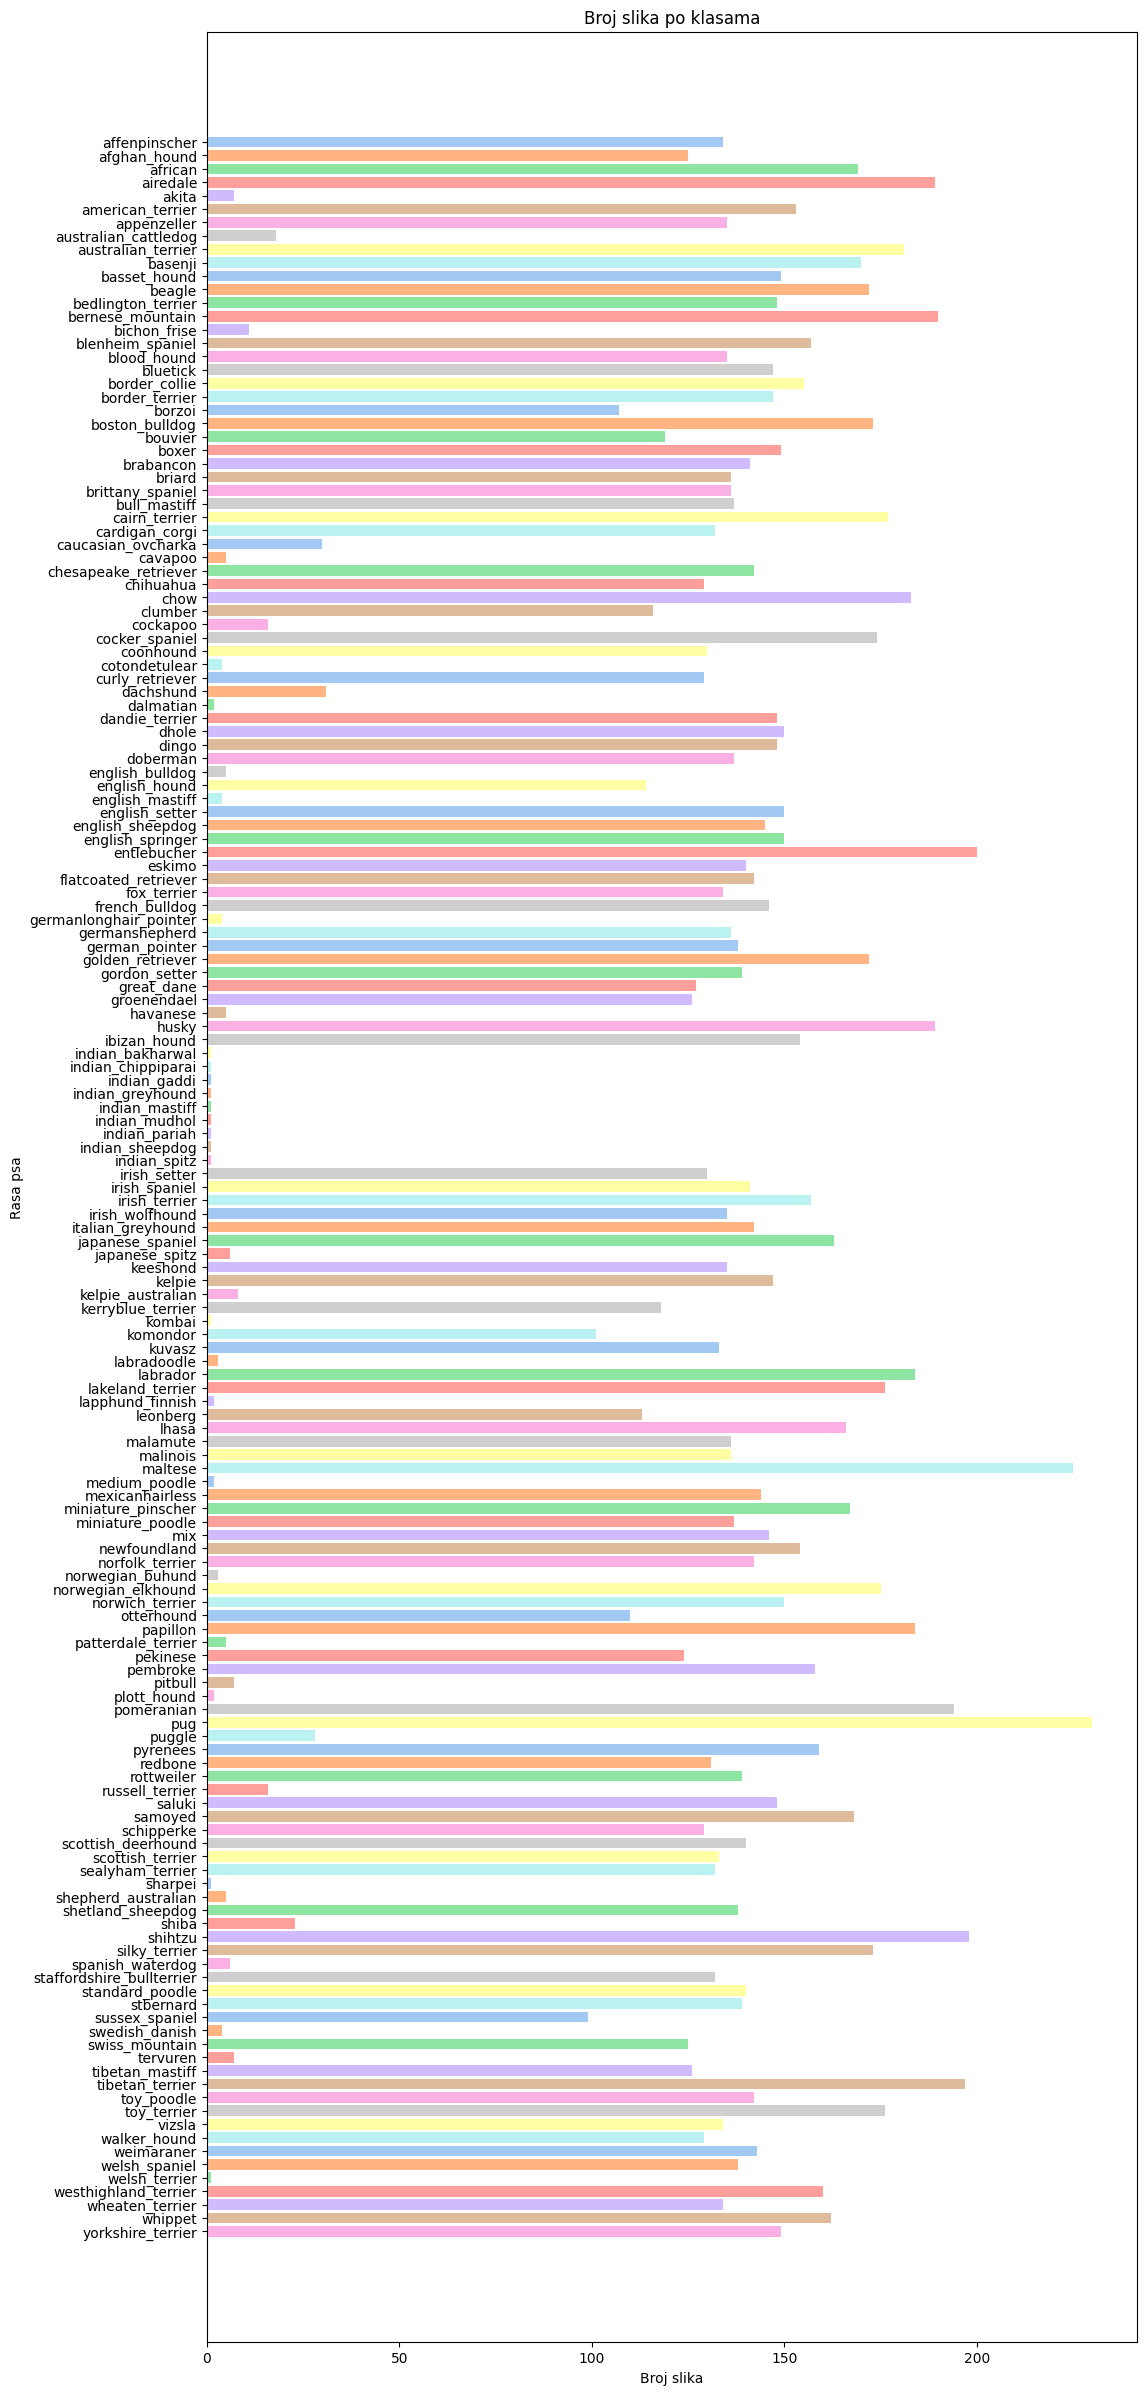

In [114]:
class_names = [cls.name for cls in classes] 

plt.figure(figsize=(12,30))
colors = sns.color_palette("pastel", len(classes))
plt.barh(class_names, image_per_class, color=colors)
plt.xlabel('Broj slika')
plt.ylabel('Rasa psa')
plt.title('Broj slika po klasama')
plt.gca().invert_yaxis()  # najviše slike gore
plt.show()

Sledeći graf prikazuje broj slika po rasama od najvećeg broja slika po klasi do najmanjeg. 

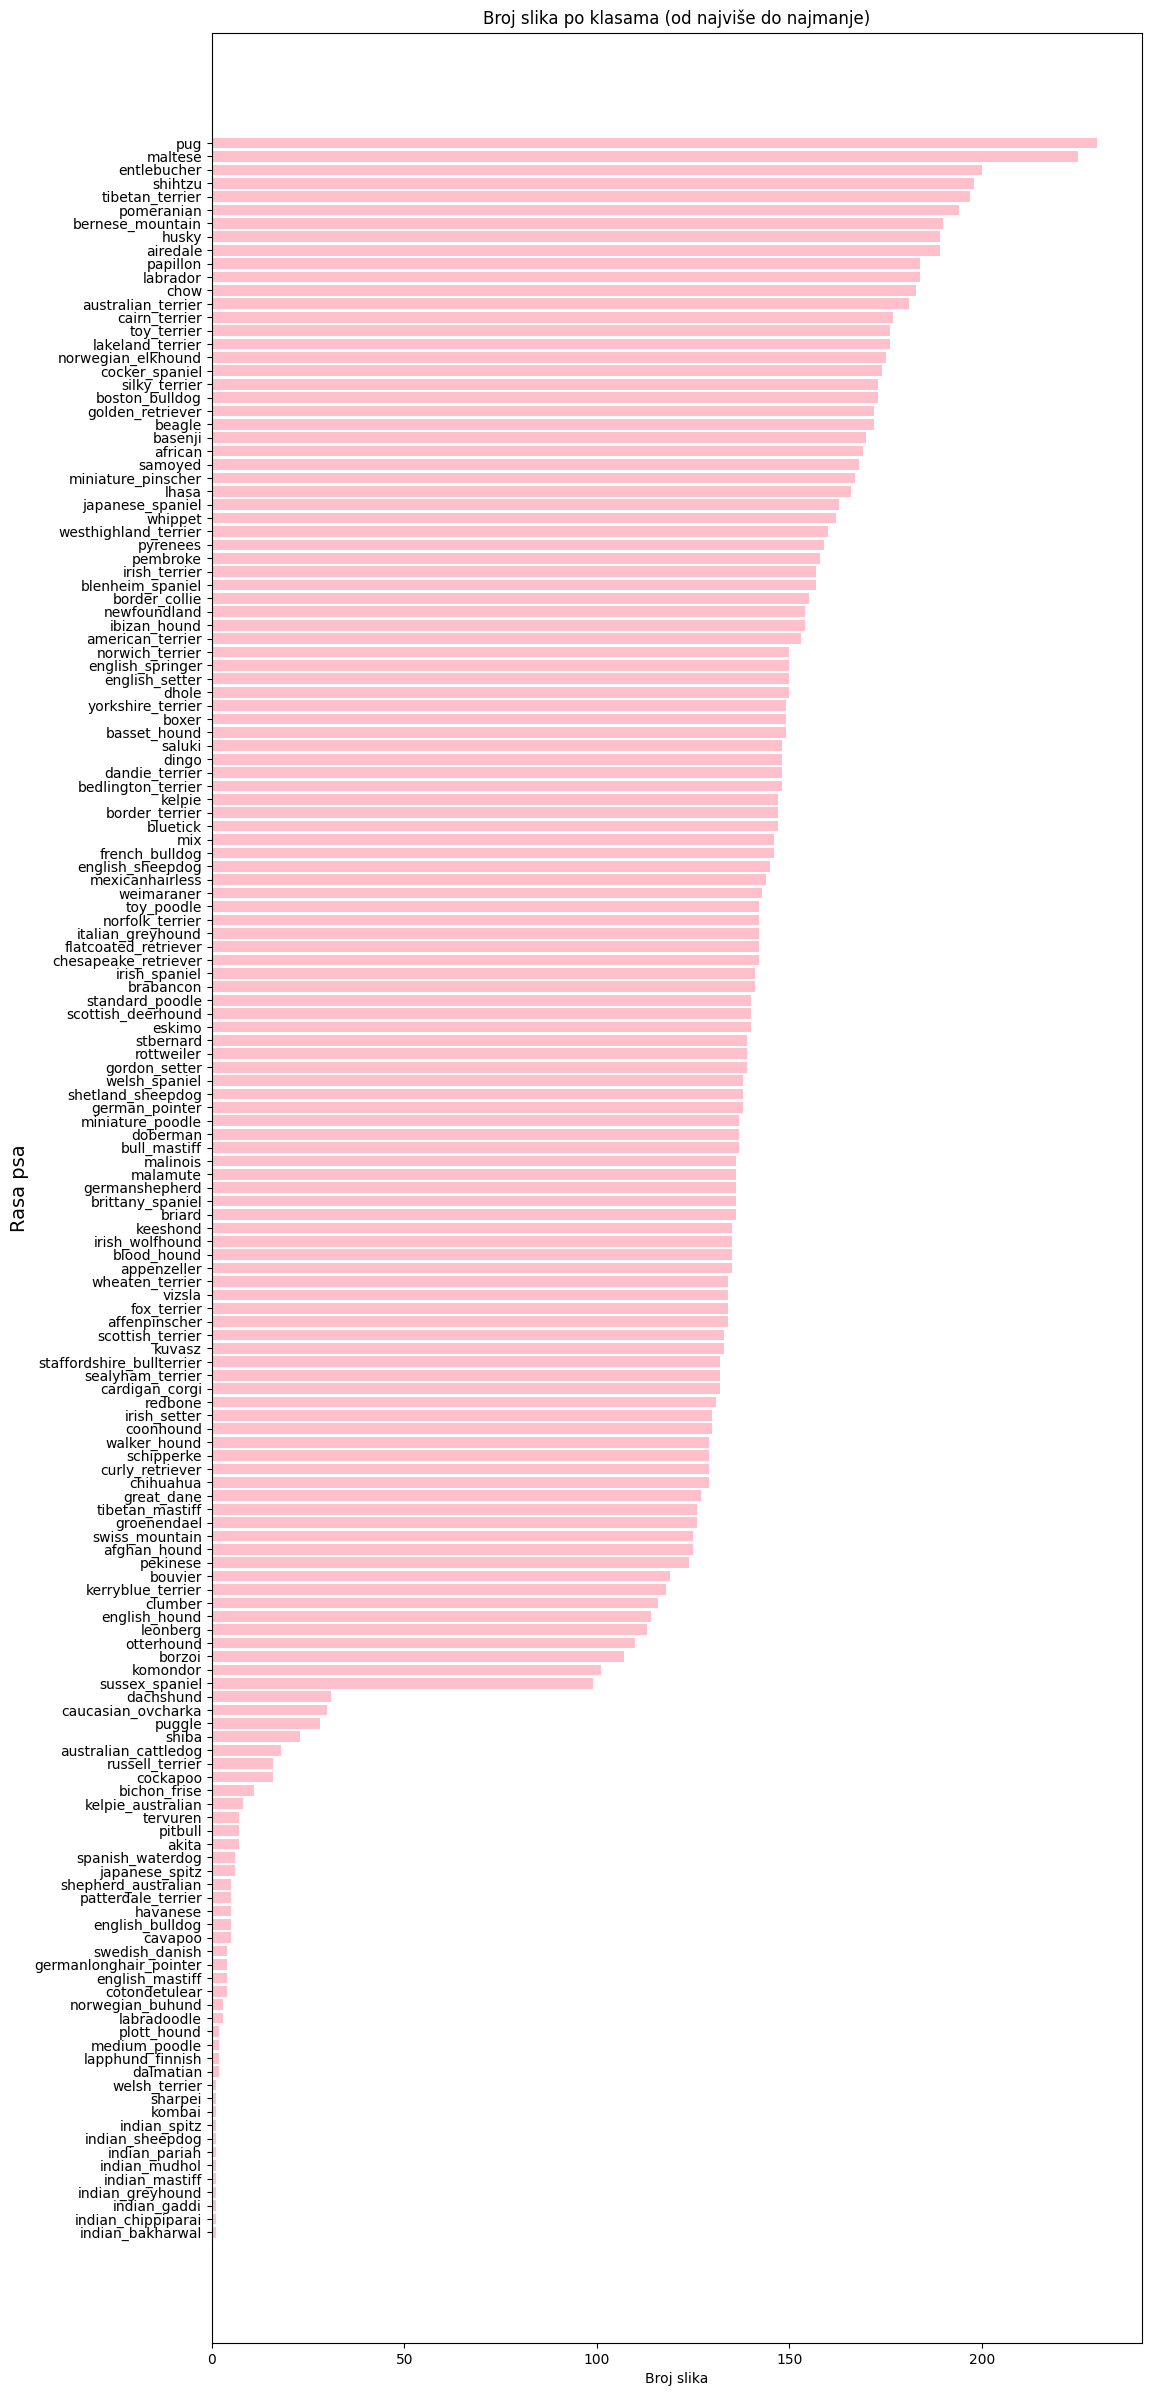

In [ ]:
# Sortiranje po broju slika (od najviše do najmanje)
sorted_pairs = sorted(zip(image_per_class, class_names), reverse=True)
sorted_counts, sorted_classes = zip(*sorted_pairs)

# Horizontalni bar graf
plt.figure(figsize=(12,30))
plt.barh(sorted_classes, sorted_counts, color='pink')
plt.xlabel('Broj slika')
plt.ylabel('Rasa psa')
plt.title('Broj slika po klasama (od najviše do najmanje)')
plt.gca().invert_yaxis()  # najviše slika gore
plt.show()

Precizno određujemo koji je najmanji a koji najveći broj slika po klasama. Na osnovu grafika iznad može se proceniti da veći broj klasa ima najmanji broj slika, pa se ispisuju sve klase sa najvećim i sa najmanjim brojem.  

In [116]:
min_count = min(image_per_class)
max_count = max(image_per_class)

# foldere koji imaju min i max broj slika
min_classes = [cls.name for cls, count in zip(classes, image_per_class) if count == min_count]
max_classes = [cls.name for cls, count in zip(classes, image_per_class) if count == max_count]

print(f"Folderi sa najmanje slika ({min_count}): {min_classes}")
print(f"Folderi sa najviše slika ({max_count}): {max_classes}")

Folderi sa najmanje slika (1): ['indian_bakharwal', 'indian_chippiparai', 'indian_gaddi', 'indian_greyhound', 'indian_mastiff', 'indian_mudhol', 'indian_pariah', 'indian_sheepdog', 'indian_spitz', 'kombai', 'sharpei', 'welsh_terrier']
Folderi sa najviše slika (230): ['pug']


Prikaz podataka (slika), i to po 3 primerka za prvih 5 klasa.

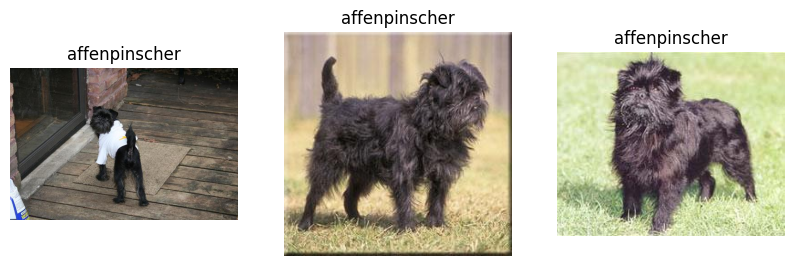

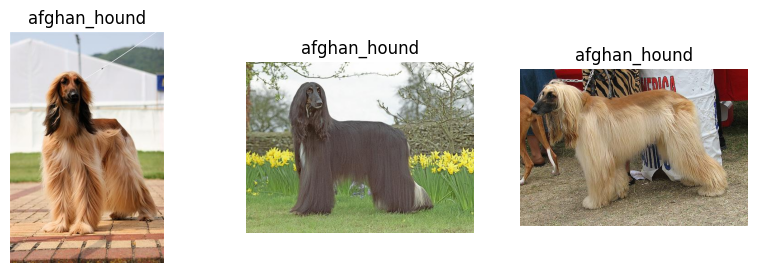

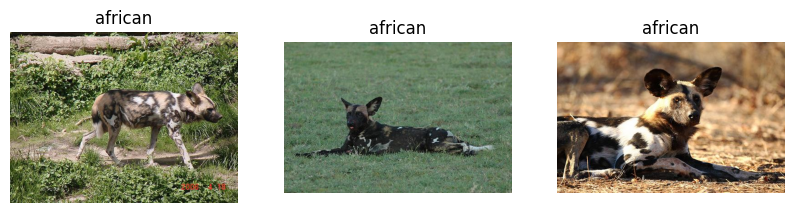

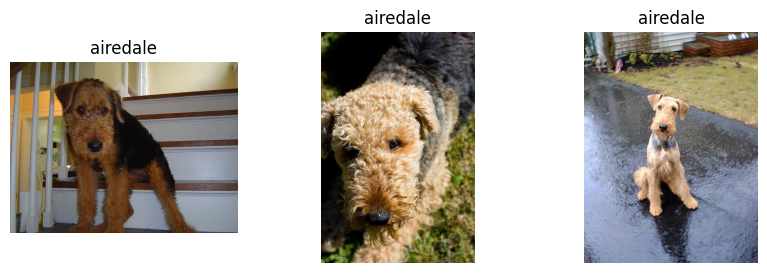

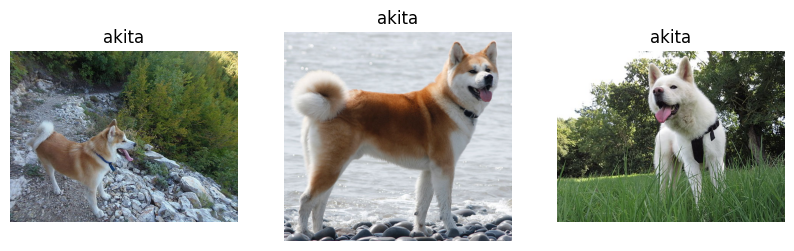

In [117]:
for cls in classes[:5]:
    imgs = list(cls.iterdir())
    random_imgs = random.sample(imgs, min(3, len(imgs)))
    plt.figure(figsize=(10,3))
    for i, img_path in enumerate(random_imgs):
        img = Image.open(img_path)
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(cls.name)
    plt.show()

Možemo primetiti da slike nisu istih dimenzija! Taj deo će biti obrađen u narednoj fazi, odnosno u okviru predprocesiranja podataka, a u nastavku če biti analizirane dimenzije slika.

In [118]:
widths, heights = [], []

for cls in classes:
    for img_path in cls.iterdir():
        if img_path.suffix.lower() == '.jpg':
            img = Image.open(img_path)
            w, h = img.size
            widths.append(w)
            heights.append(h)



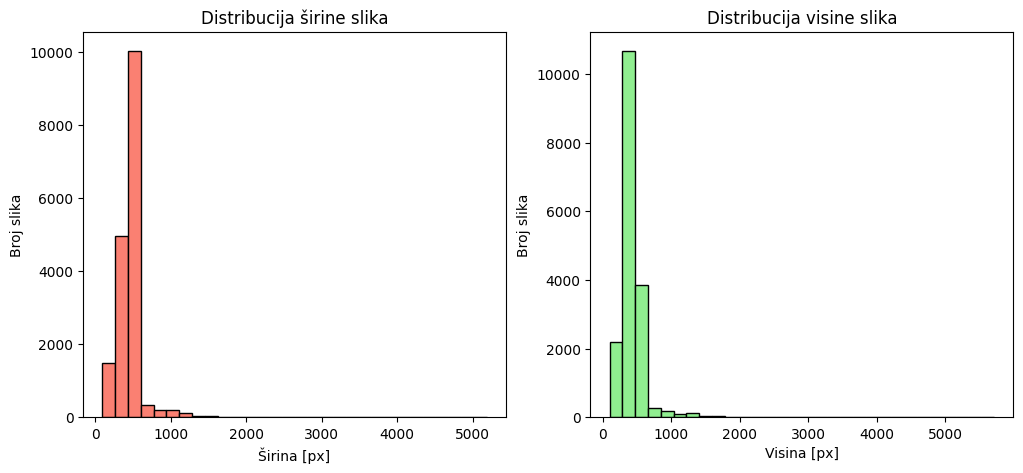

In [124]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(widths, bins=30, color='salmon', edgecolor='black')
plt.xlabel('Širina [px]')
plt.ylabel('Broj slika')
plt.title('Distribucija širine slika')

plt.subplot(1,2,2)
plt.hist(heights, bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Visina [px]')
plt.ylabel('Broj slika')
plt.title('Distribucija visine slika')
plt.show()

### **Faza2**:Pipeline za treniranje, validaciju i testiranje modela